<a href="https://colab.research.google.com/github/vanessatoscan94/BINA/blob/main/BINA_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries laden
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
import plotly.graph_objects as go
import openpyxl

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount ("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


## **Auswertung zur Bevölkerung**

<ipython-input-14-9e18a042cf45>:51: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, city_data['Wohnbevölkerung'].max() + 1000, 500)


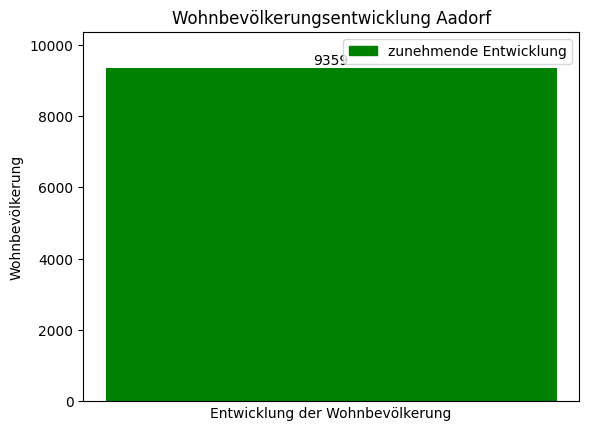

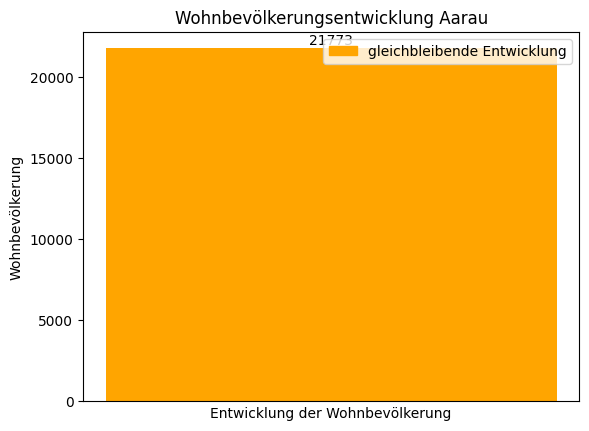

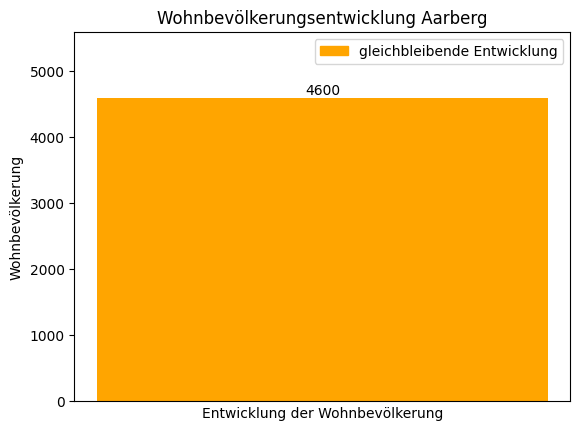

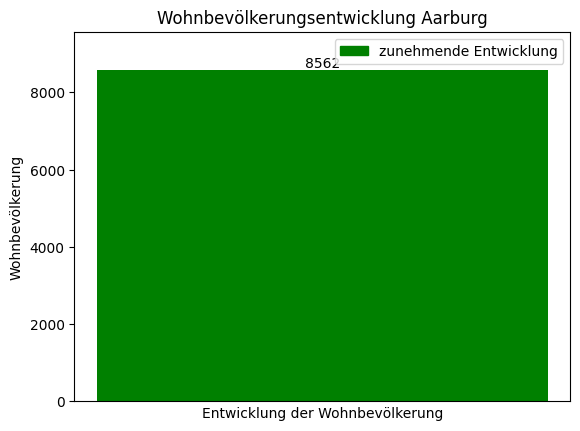

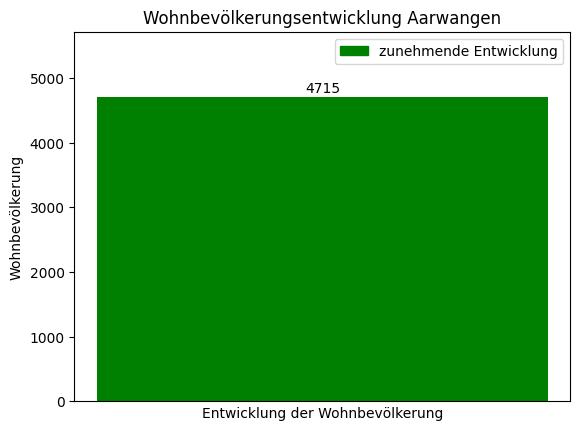

In [ ]:
# Auf Excel-Datei zugreifen
file_path = '/content/gdrive/MyDrive/datasets/table_residents.xlsx'  
data = pd.read_excel(file_path)



# Erstelle eine Liste der eindeutigen Werte in der Spalte "city"
cities = data['city'].unique()

# Erstelle einen Barplot für jede Stadt
for city in cities[:5]:  # Begrenze die Schleife auf die ersten fünf Städte
    # Filtere die Daten für die aktuelle Stadt
    city_data = data[data['city'] == city].copy()

    # Konvertiere die Werte in der Spalte "Wohnbevölkerung" in numerische Werte
    city_data['Wohnbevölkerung'] = city_data['Wohnbevölkerung'].str.replace("'", "").astype(int)

    # Erstelle eine Liste der Farben basierend auf dem Wert in der Spalte "Entwicklung"
    colors = []
    labels = []
    for development in city_data['Entwicklung']:
        if development == 'pfeil hoch':
            colors.append('green')
            labels.append('zunehmende Entwicklung')
        elif development == 'gleichbleibend':
            colors.append('orange')
            labels.append('gleichbleibende Entwicklung')
        elif development == 'pfeil tief':
            colors.append('red')
            labels.append('abnehmende Entwicklung')

    # Erstelle den Barplot mit Matplotlib
    plt.bar(range(len(city_data)), city_data['Wohnbevölkerung'], color=colors)

    # Füge den Wert oberhalb des Balkens hinzu
    for i, val in enumerate(city_data['Wohnbevölkerung']):
        plt.text(i, val + 10, str(val), ha='center', va='bottom')

    # Anpassung der Achsenbeschriftungen und des Titels
    plt.xlabel('Entwicklung der Wohnbevölkerung')
    plt.ylabel('Wohnbevölkerung')
    plt.title(f'Wohnbevölkerungsentwicklung {city}')

    # Erstelle die Legende
    legend_labels = list(set(labels))  # Entferne doppelte Einträge
    legend_colors = [colors[labels.index(label)] for label in legend_labels]
    legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
    plt.legend(legend_handles, legend_labels)

    # Passe die Y-Achse an
    plt.ylim(0, city_data['Wohnbevölkerung'].max() + 1000, 500)


    # Entferne die Zahlen auf der X-Achse
    plt.xticks([])

    # Grafik anzeigen
    plt.show()


## **Auswertung zu den Distanzen**



/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


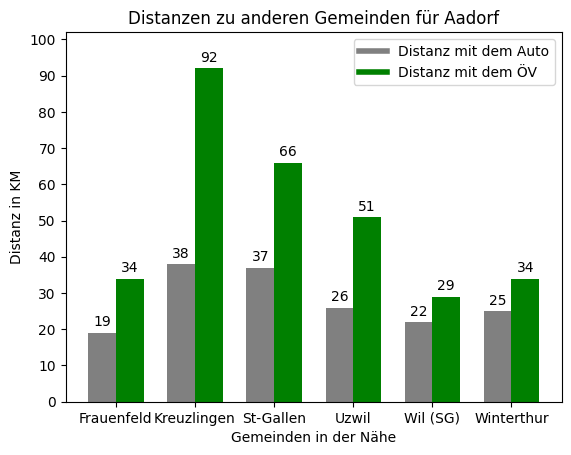

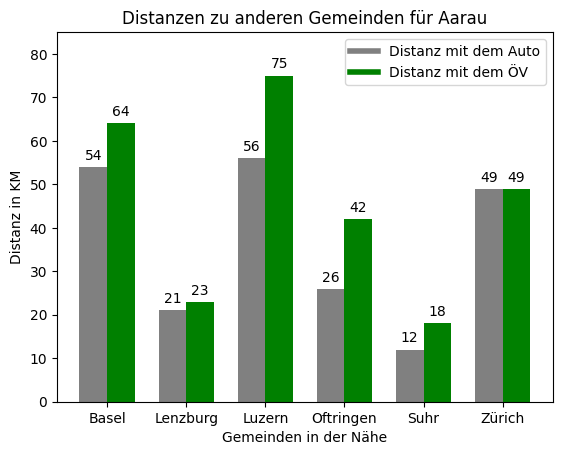

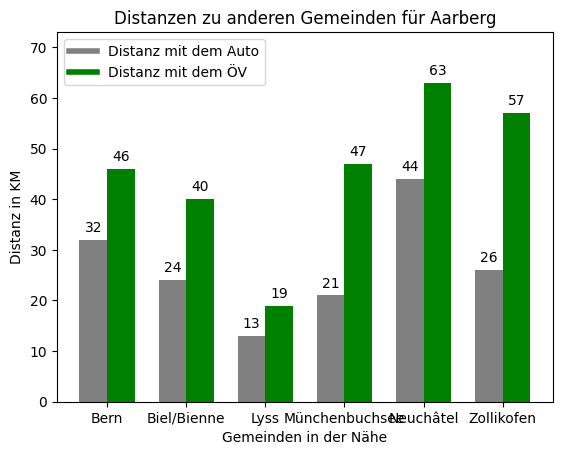

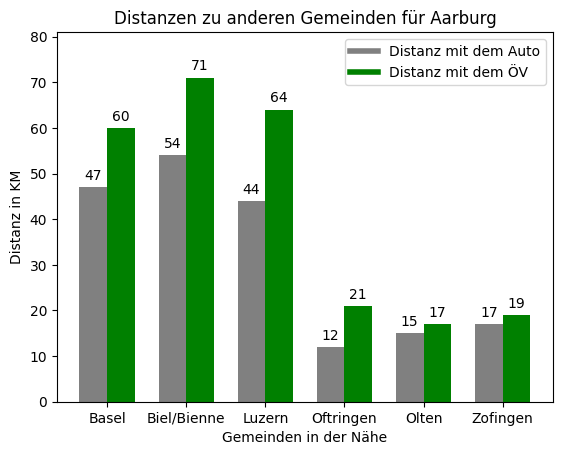

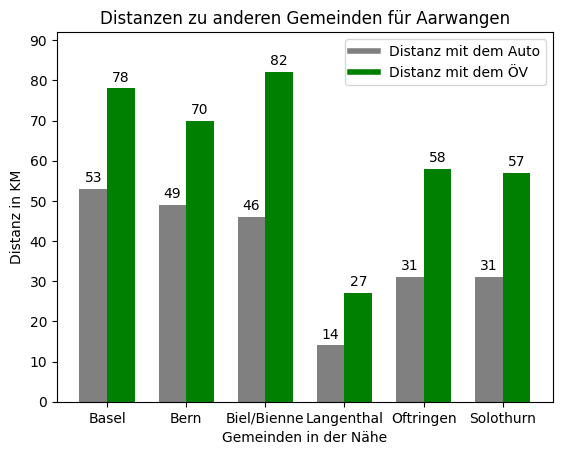

In [ ]:
# Auf Excel-Datei zugreifen
file_path = '/content/gdrive/MyDrive/datasets/table_near_centers.xlsx' 
data = pd.read_excel(file_path)


# Eindeutige Werte in der Spalte "city"
unique_cities = data['city'].unique()

# Breite der Balken
bar_width = 0.35

# Für jeden eindeutigen Wert ein separates Balkendiagramm erstellen
for city in unique_cities[:5]:  # Begrenze die Schleife auf die ersten fünf Städte
    # Filtere die Daten für den aktuellen Wert in der Spalte "city"
    city_data = data[data['city'] == city]

    # Eindeutige Werte in der Spalte "near_center"
    unique_near_center = city_data['near_center'].unique()

    # Positionen für die X-Achse
    x = np.arange(len(unique_near_center))

    # Balkendiagramm erstellen
    for i, near_center_val in enumerate(unique_near_center):
        # Filtere die Daten für den aktuellen Wert in der Spalte "near_center"
        near_center_data = city_data[city_data['near_center'] == near_center_val]

        # Werte für "by=car"
        by_car_values = near_center_data[near_center_data['by'] == 'car']['distance']

        # Werte für "by=transport"
        by_transport_values = near_center_data[near_center_data['by'] == 'transport']['distance']

        # Balken für "by=car" erstellen
        plt.bar(x[i] - bar_width / 2, by_car_values, width=bar_width, label='by=car', color='gray')

        # Balken für "by=transport" erstellen
        plt.bar(x[i] + bar_width / 2, by_transport_values, width=bar_width, label='by=transport', color='green')

        # Wert oberhalb des Balkens hinzufügen
        for j, val in enumerate(by_car_values):
            plt.text(x[i] - bar_width / 2, val + 1, str(val), ha='center', va='bottom', color='black')

        for j, val in enumerate(by_transport_values):
            plt.text(x[i] + bar_width / 2, val + 1, str(val), ha='center', va='bottom', color='black')

    # Achsenbeschriftungen und Titel hinzufügen
    plt.xlabel('Gemeinden in der Nähe')
    plt.ylabel('Distanz in KM')
    plt.title(f'Distanzen zu anderen Gemeinden für {city}')

    # X-Achse beschriften
    plt.xticks(x, unique_near_center)

    # Y-Achse anpassen
    plt.ylim(0, city_data['distance'].max() + 10)
    plt.yticks(np.arange(0, city_data['distance'].max() + 10, 10))

    # Legende anzeigen
    legend_elements = [
        plt.Line2D([0], [0], color='gray', lw=4, label='Distanz mit dem Auto'),
        plt.Line2D([0], [0], color='green', lw=4, label='Distanz mit dem ÖV')
    ]
    plt.legend(handles=legend_elements)

    # Diagramm anzeigen
    plt.show()

## **Auswertung zum Einkommen**

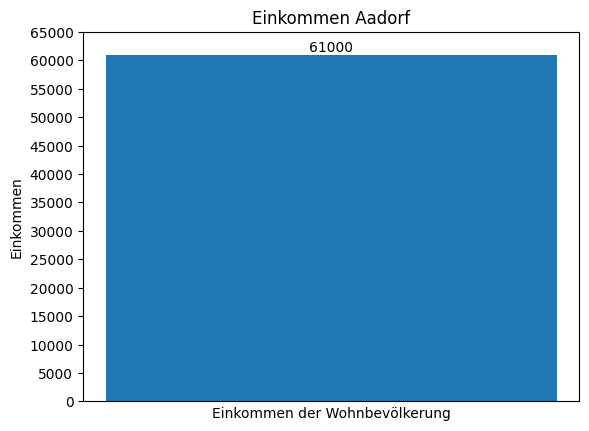

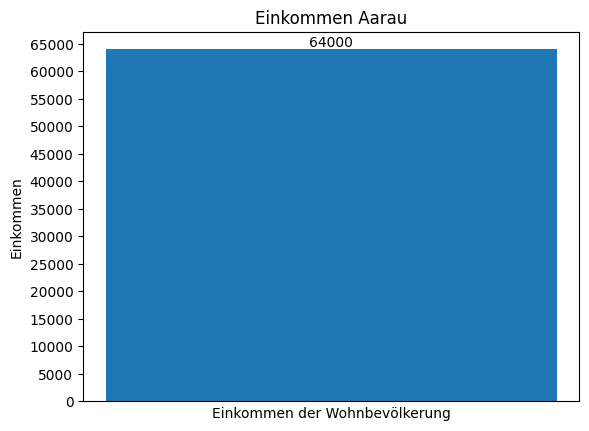

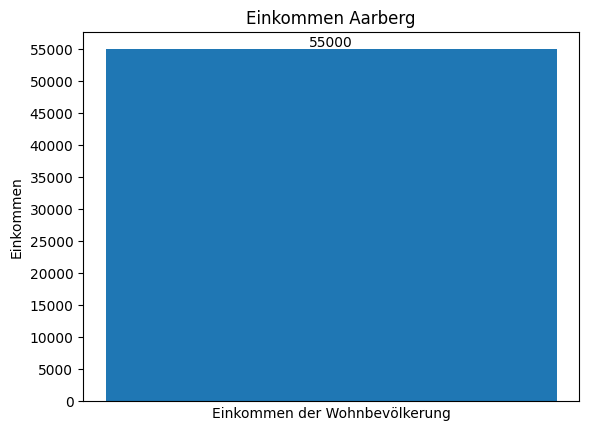

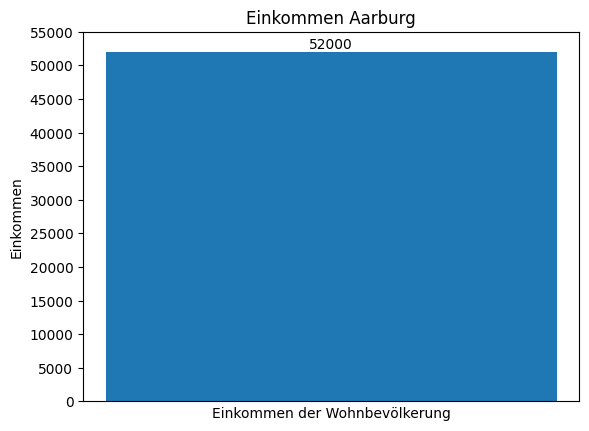

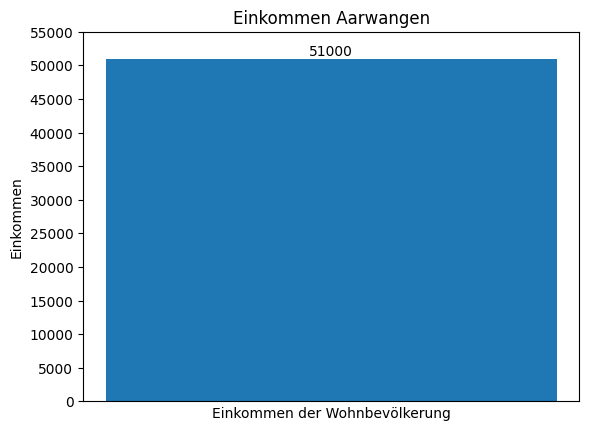

In [ ]:
# Auf Excel-Datei zugreifen
file_path = '/content/gdrive/MyDrive/datasets/table_residents.xlsx' 
data = pd.read_excel(file_path)


# Erstelle eine Liste der eindeutigen Werte in der Spalte "city"
cities = data['city'].unique()

# Erstelle einen Barplot für jede Stadt
for city in unique_cities[:5]:  # Begrenze die Schleife auf die ersten fünf Städte
    # Filtere die Daten für die aktuelle Stadt
    city_data = data[data['city'] == city].copy()

    # Konvertiere die Werte in der Spalte "Wohnbevölkerung" in numerische Werte
    city_data['Einkommen'] = city_data['Einkommen'].str.replace("'", "").astype(int)

    # Erstelle den Barplot mit Matplotlib
    plt.bar(range(len(city_data)), city_data['Einkommen'])

    # Füge den Wert oberhalb des Balkens hinzu
    for i, val in enumerate(city_data['Einkommen']):
        plt.text(i, val + 10, str(val), ha='center', va='bottom')

    # Anpassung der Achsenbeschriftungen und des Titels
    plt.xlabel('Einkommen der Wohnbevölkerung')
    plt.ylabel('Einkommen')
    plt.title(f'Einkommen {city}')

    # Passe die Y-Achse an
    y_ticks = np.arange(0, city_data['Einkommen'].max() + 5000, 5000)
    plt.yticks(y_ticks)

    # Entferne die Zahlen auf der X-Achse
    plt.xticks([])

    # Grafik anzeigen
    plt.show()

## **Auswertung zur Attraktivität der Gemeinden**

In [ ]:
# Auf Excel-Datei zugreifen
file_path_1 = '/content/gdrive/MyDrive/datasets/table_residents_new.xlsx' 
file_path_2 = '/content/gdrive/MyDrive/datasets/table_tax.xlsx' 

# Einlesen der Daten
table1 = pd.read_excel(file_path_1)
table2 = pd.read_excel(file_path_2)

# Zusammenführen der Tabellen basierend auf dem Schlüssel "city"
merged_table = pd.merge(table1, table2, on='city', how='inner')

# Filtern der Daten
filtered_data = merged_table[merged_table['type'] == 'Gemeinde']

# Bereinigen der Daten in der Spalte "Einkommen"
filtered_data['Einkommen'] = filtered_data['Einkommen'].str.replace("'", "").astype(int)

# Konvertieren der Spalte "Steuerfuss" in numerischen Datentyp
filtered_data['Steuerfuss'] = pd.to_numeric(filtered_data['Steuerfuss'], errors='coerce')

# Einteilung in die Kategorien A-Gemeinden, B-Gemeinden und C-Gemeinden basierend auf Einkommen, Steuerfuss und Entwicklung
filtered_data['Kategorie'] = 'C-Gemeinden'  # Alle Gemeinden zunächst der Kategorie "C-Gemeinden" zuweisen

# Bestimmung der Quantile für die Variablen "Einkommen" und "Steuerfuss"
income_thresholds = filtered_data['Einkommen'].quantile([0.33, 0.66])
tax_thresholds = filtered_data['Steuerfuss'].quantile([0.33, 0.66])

# Einteilung der Gemeinden in die Kategorien A-Gemeinden, B-Gemeinden und C-Gemeinden basierend auf den Quantilen
filtered_data.loc[(filtered_data['Einkommen'] > income_thresholds[0.66]) & (filtered_data['Steuerfuss'] < tax_thresholds[0.33]) & (filtered_data['Entwicklung'] == 1), 'Kategorie'] = 'A-Gemeinden'
filtered_data.loc[(filtered_data['Einkommen'] > income_thresholds[0.33]) & (filtered_data['Einkommen'] <= income_thresholds[0.66]) & (filtered_data['Steuerfuss'] < tax_thresholds[0.33]) & (filtered_data['Entwicklung'] == 0), 'Kategorie'] = 'B-Gemeinden'
filtered_data.loc[~filtered_data['Kategorie'].isin(['A-Gemeinden', 'B-Gemeinden']), 'Kategorie'] = 'C-Gemeinden'

# Erstellen der Treemap
fig = px.treemap(filtered_data, path=['Kategorie', 'city'], values='Einkommen',
                 color='Kategorie', color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c'],
                 hover_data={'Steuerfuss': ':.2f', 'Einkommen': ':.2f', 'Entwicklung': True},
                 labels={'Einkommen': 'Einkommen in CHF', 'Steuerfuss': 'Steuerfuss'})

# Anpassen der Legende
fig.update_layout(legend=dict(title=dict(text='Kategorie')))

# Hinzufügen des Titels
fig.update_layout(title='Gemeindeattraktivität')

# Anzeigen der Treemap
fig.show()

<ipython-input-18-d7b2110db8e2>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-d7b2110db8e2>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-d7b2110db8e2>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## **Auswertung zur Korrelation zwischen dem Steuerfuss und dem Einkommen**

In [ ]:
# Auf Excel-Datei zugreifen
file_path_1 = '/content/gdrive/MyDrive/datasets/table_residents_new.xlsx' 
file_path_2 = '/content/gdrive/MyDrive/datasets/table_tax.xlsx' 

# Einlesen der Daten
table1 = pd.read_excel(file_path_1)
table2 = pd.read_excel(file_path_2)

# Zusammenführen der Tabellen basierend auf dem Schlüssel "city"
merged_table = pd.merge(table1, table2, on='city', how='inner')

# Filtern der Daten basierend auf dem Wert in der Spalte "type"
filtered_table = merged_table[merged_table['type'] == 'Gemeinde']

# Entfernen von Apostrophen, Kommas und negativem Vorzeichen aus der Spalte "Einkommen"
filtered_table.loc[:, 'Einkommen'] = filtered_table['Einkommen'].str.replace("'", "").str.replace(",", "").str.replace("-", "")

# Entfernen von negativem Vorzeichen aus der Spalte "Steuerfuss"
filtered_table.loc[:, 'Steuerfuss'] = filtered_table['Steuerfuss'].str.replace("-", "")

# Füllen von leeren Zellen mit NaN-Werten
filtered_table['Einkommen'] = pd.to_numeric(filtered_table['Einkommen'], errors='coerce')
filtered_table['Steuerfuss'] = pd.to_numeric(filtered_table['Steuerfuss'], errors='coerce')

# Entfernen von Zeilen mit fehlenden Werten in den Spalten "Einkommen" und "Steuerfuss"
filtered_table = filtered_table.dropna(subset=['Einkommen', 'Steuerfuss'])

# Sortieren der Datenpunkte nach Einkommen
filtered_table = filtered_table.sort_values(by='Einkommen')

# Berechnen der Korrelationskoeffizienten
correlation_coefficient = filtered_table['Einkommen'].corr(filtered_table['Steuerfuss'])

# Erstellen des Scatterplots mit vollständigen Datenpunkten und City als Hover-Information
fig = px.scatter(filtered_table, x='Einkommen', y='Steuerfuss', trendline="ols", trendline_color_override="red",
                 hover_data=['city'])

# Hinzufügen der Korrelationslinie als separaten Trace
fig.add_trace(go.Scatter(
    x=filtered_table['Einkommen'],
    y=filtered_table['Einkommen'] * correlation_coefficient,
    mode='lines',
    name='Korrelationslinie',
    line=dict(color='red', width=2)
))

# Anpassen der Achsenbeschriftungen und Skalierung
fig.update_layout(
    xaxis=dict(title='Einkommen'),
    yaxis=dict(title='Steuerfuss', range=[0, filtered_table['Steuerfuss'].max() + 1]),
    title='Korrelation zwischen Einkommen und Steuerfuss'
)

# Anzeigen des Plots
fig.show()

<ipython-input-19-dbffd2c0a74c>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-dbffd2c0a74c>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-dbffd2c0a74c>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-dbff